## Setting the environment

In [1]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from numpy import array

import seaborn as sns
import plotly.express as px 
from sklearn.model_selection import train_test_split as tts

from keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import os
import parse
import multiprocessing
from bs4 import BeautifulSoup # Text Cleaning
import re, string # Regular Expressions, String
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer # for word stemming
from nltk.stem import WordNetLemmatizer # for word lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer

from keras_preprocessing.sequence import pad_sequences
import unicodedata
import html
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading dataset

In [2]:
# Importing Logistics Support Reviews dataset

logistics_review = pd.read_csv("logistics.csv")
logistics_reviews=logistics_review.astype(str)

In [3]:
df = pd.read_csv("Review with 1 and 0 value.csv")
df=df.astype(str)

In [4]:
# Dataset exploration
logistics_reviews.shape

(10153, 2)

In [5]:
logistics_reviews.head(20)

Review Sentiment
0                Good and fast service And Recommend   Positive
1     Disgusting service, i Hat this courier company   Negative
2                              Very very bad service   Negative
3                                  Excellent service   Positive
4           Their service is so good  I am satisfied   Positive
5      Very bad service  Specially for home delivery   Negative
6   worst one  no customers services, rude behaviour   Negative
7               its make a important rule in our life  Positive
8                    need to improve customer service  Positive
9   Worst service ever  Their employees are illite...  Negative
10  Worst service ever  Every single employee is a...  Negative
11                           Good service All Country  Positive
12  Never send food items via them  They eat the f...  Negative
13           The worst courier service of our country  Negative
14  good delivery surveys,24-48 ghonta delivery , ...  Positive
15  Worst service ever  They even don’t know how t...  Negative
16  I delivered a photo frame and a mug to my clos...  Positive
17  Total rubbish, totally third class , disappoin...  Negative
18                  very very worse customer service   Negative
19                                       Love remains  Positive

In [6]:
# Checking for missing values

logistics_reviews.isnull().values.any()

False

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

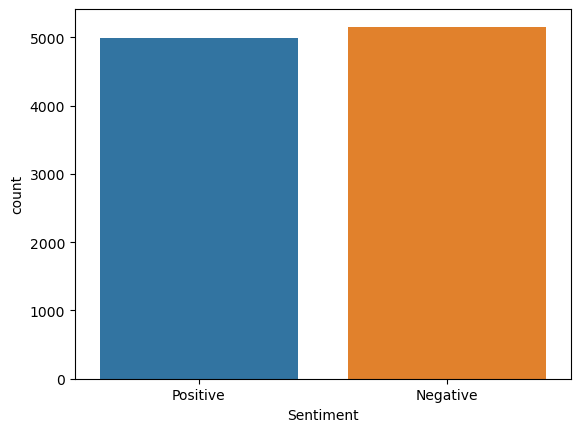

In [7]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='Sentiment', data=logistics_reviews)

## Data Preprocessing

In [8]:
logistics_reviews["Review"][43]

'Alhamdulillah, I have benefited a lot by giving the complaint with proof on the page for charging extra money for receiving the parcel at the upazila level  Jazakumullah Khairon '

In [9]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

In [10]:
def clean_text1(text):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    text = str(text).lower()
    #tweet = str(tweet).lower()

    # Remove html tags
   # text = remove_tags(text)

    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text)

    return text

In [11]:
# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2=lambda x:clean_text2(x)

In [12]:
data = logistics_review
data['Review']=pd.DataFrame(data.Review.apply(clean_text1))

In [13]:
data['Review']=pd.DataFrame(data.Review.apply(cleaned2))
data.head()

Review Sentiment
0             good fast service recommend   Positive
1  disgusting service hat courier company   Negative
2                             bad service   Negative
3                       excellent service   Positive
4                  service good satisfied   Positive

In [14]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [15]:
# Calling preprocessing_text function on logistics_reviews

X = []
sentences = list(logistics_reviews['Review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [16]:
# Sample cleaned up movie review 

X[43]

# As we shall use Word Embeddings, stemming/lemmatization is not performed as a preprocessing step here

'alhamdulillah benefited lot giving complaint proof page charging extra money receiving parcel upazila level jazakumullah khairon '

In [17]:
# Converting sentiment labels to 0 & 1

y = logistics_reviews['Sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

In [19]:
text = logistics_reviews["Review"][0]
print(text)
print("<========>")
print(word_tokenize(text))

Good and fast service And Recommend 
<========>
['Good', 'and', 'fast', 'service', 'And', 'Recommend']


In [20]:
corpus = []
for text in logistics_reviews["Review"]:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [21]:
num_words = len(corpus)
print(corpus)

[['good', 'and', 'fast', 'service', 'and', 'recommend'], ['disgusting', 'service', ',', 'i', 'hat', 'this', 'courier', 'company'], ['very', 'very', 'bad', 'service'], ['excellent', 'service'], ['their', 'service', 'is', 'so', 'good', 'i', 'am', 'satisfied'], ['very', 'bad', 'service', 'specially', 'for', 'home', 'delivery'], ['worst', 'one', 'no', 'customers', 'services', ',', 'rude', 'behaviour'], ['its', 'make', 'a', 'important', 'rule', 'in', 'our', 'life'], ['need', 'to', 'improve', 'customer', 'service'], ['worst', 'service', 'ever', 'their', 'employees', 'are', 'illiterate', 'and', 'their', 'behavior', 'is', 'like', 'a', 'terrotist', '!'], ['worst', 'service', 'ever', 'every', 'single', 'employee', 'is', 'a', 'thief'], ['good', 'service', 'all', 'country'], ['never', 'send', 'food', 'items', 'via', 'them', 'they', 'eat', 'the', 'food', 'items', 'and', 'later', 'say', 'the', 'parcel', 'has', 'been', 'lost'], ['the', 'worst', 'courier', 'service', 'of', 'our', 'country'], ['good', 

In [22]:
tokenizer = Tokenizer(oov_token='<nothing>') # creating tokenizer instance and, labeling out of vocabulary words as <nothing>

In [23]:
tokenizer.fit_on_texts(corpus)

In [24]:
max(tokenizer.word_index)

'😡😡'

In [25]:
tokenizer.word_counts

OrderedDict([('good', 1051),
             ('and', 4310),
             ('fast', 84),
             ('service', 141),
             ('recommend', 76),
             ('disgusting', 6),
             (',', 5937),
             ('i', 6068),
             ('hat', 2),
             ('this', 5393),
             ('courier', 17),
             ('company', 144),
             ('very', 933),
             ('bad', 348),
             ('excellent', 261),
             ('their', 140),
             ('is', 3528),
             ('so', 671),
             ('am', 263),
             ('satisfied', 28),
             ('specially', 3),
             ('for', 2343),
             ('home', 58),
             ('delivery', 2423),
             ('worst', 246),
             ('one', 1043),
             ('no', 392),
             ('customers', 6),
             ('services', 4),
             ('rude', 10),
             ('behaviour', 4),
             ('its', 223),
             ('make', 155),
             ('a', 5286),
             ('important

In [26]:
combine=logistics_reviews.append(logistics_review,ignore_index=True)

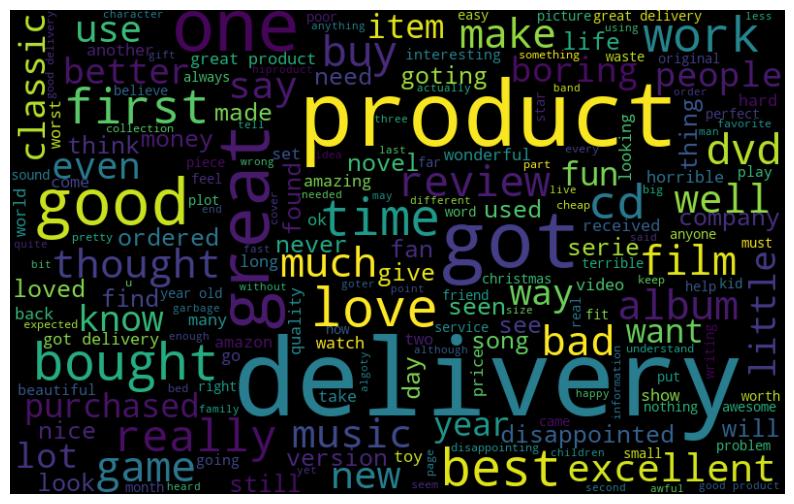

In [27]:
all_words = ' '.join([text for text in combine['Review']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Preparing embedding layer

In [28]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [29]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

12766

In [30]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [31]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [32]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [33]:
embedding_matrix.shape

(12766, 100)

# Model Training with:

## Simple Neural Network

In [21]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [22]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1276600   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 1,286,601
Trainable params: 10,001
Non-trainable params: 1,276,600
_________________________________________________________________
None


In [27]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
51/51 [==============================] - 0s 9ms/step - loss: 0.0285 - acc: 0.9995 - val_loss: 0.0251 - val_acc: 0.9988
Epoch 2/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0237 - acc: 0.9995 - val_loss: 0.0211 - val_acc: 0.9988
Epoch 3/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0204 - acc: 0.9995 - val_loss: 0.0183 - val_acc: 0.9988
Epoch 4/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0180 - acc: 0.9995 - val_loss: 0.0162 - val_acc: 0.9994
Epoch 5/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0162 - acc: 0.9995 - val_loss: 0.0146 - val_acc: 0.9994
Epoch 6/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0147 - acc: 0.9997 - val_loss: 0.0133 - val_acc: 0.9994
Epoch 7/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0136 - acc: 0.9997 - val_loss: 0.0123 - val_acc: 0.9994
Epoch 8/15
51/51 [==============================] - 0s 8ms/step - loss: 0.0126 - acc: 0.99

In [24]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

64/64 [==============================] - 0s 3ms/step - loss: 0.0378 - acc: 0.9995


In [28]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.03782855346798897
Test Accuracy: 0.9995076060295105


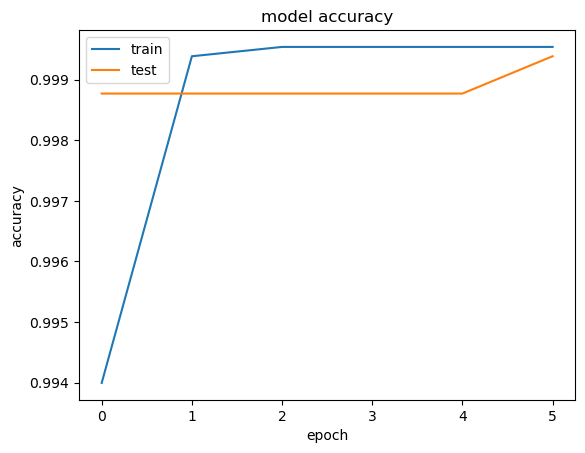

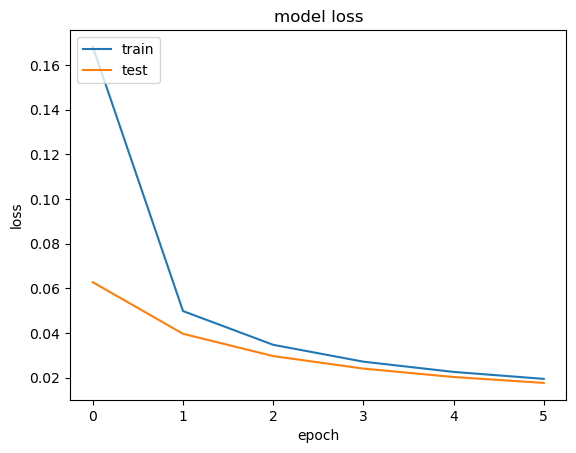

In [26]:
# Model Performance Charts
plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Convolutional Neural Network

In [29]:
from keras.layers import Conv1D

In [30]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [31]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1276600   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,340,857
Trainable params: 64,257
Non-trainable params: 1,276,600
_________________________________________________________________
None


In [32]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.2)
#l_hiscnn_modetory = cnn_model.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
26/26 [==============================] - 2s 69ms/step - loss: 0.0522 - acc: 0.9983 - val_loss: 0.0097 - val_acc: 0.9994
Epoch 2/15
26/26 [==============================] - 2s 62ms/step - loss: 0.0100 - acc: 0.9997 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 3/15
26/26 [==============================] - 2s 82ms/step - loss: 0.0079 - acc: 0.9998 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 4/15
26/26 [==============================] - 3s 103ms/step - loss: 0.0067 - acc: 0.9998 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 5/15
26/26 [==============================] - 3s 101ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 6/15
26/26 [==============================] - 3s 102ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 7/15
26/26 [==============================] - 3s 103ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 8/15
26/26 [==============================] - 2s 60ms/step - loss: 0.0043

In [33]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

64/64 [==============================] - 0s 4ms/step - loss: 0.0047 - acc: 1.0000


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3356787860393524
Test Accuracy: 0.8579000234603882


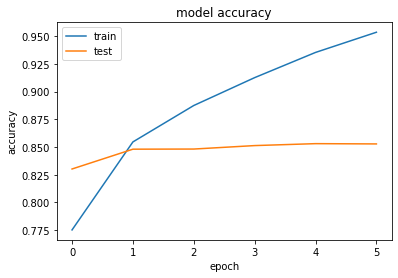

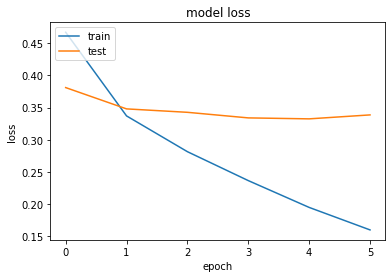

In [ ]:
# Model Performance Charts
plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Recurrent Neural Network (LSTM)

In [ ]:
from keras.layers import LSTM

In [ ]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,356,777
Trainable params: 117,377
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 82s 320ms/step - loss: 0.5498 - acc: 0.7266 - val_loss: 0.4619 - val_acc: 0.7909
Epoch 2/6
250/250 [==============================] - 79s 317ms/step - loss: 0.4309 - acc: 0.8056 - val_loss: 0.4138 - val_acc: 0.8207
Epoch 3/6
250/250 [==============================] - 80s 319ms/step - loss: 0.3883 - acc: 0.8302 - val_loss: 0.3593 - val_acc: 0.8457
Epoch 4/6
250/250 [==============================] - 80s 318ms/step - loss: 0.3506 - acc: 0.8489 - val_loss: 0.3402 - val_acc: 0.8564
Epoch 5/6
250/250 [==============================] - 79s 317ms/step - loss: 0.3259 - acc: 0.8621 - val_loss: 0.3239 - val_acc: 0.8585
Epoch 6/6
250/250 [==============================] - 79s 317ms/step - loss: 0.3067 - acc: 0.8712 - val_loss: 0.3148 - val_acc: 0.8670


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 11s 34ms/step - loss: 0.3194 - acc: 0.8643


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.31936636567115784
Test Accuracy: 0.864300012588501


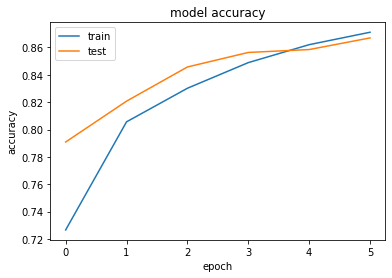

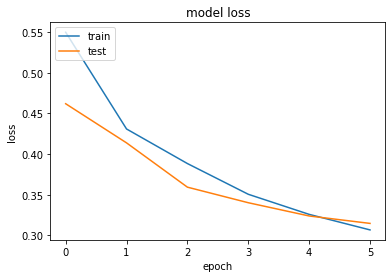

In [ ]:
# Model Performance Charts
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Simple RNN

In [44]:
x=df['Review']
y=df['liked']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [46]:
print("shape of X_train: ",X_train.shape)
print("shape of X_test: ",X_test.shape)

print("shape of y_train: ",y_train.shape)
print("shape of y_test: ",y_test.shape)

shape of X_train:  (8122,)
shape of X_test:  (2031,)
shape of y_train:  (8122,)
shape of y_test:  (2031,)


In [47]:
# we will use the Tokenizer class : create a word-to-index dictionary. In the word-to-index dictionary,

tokenizer = Tokenizer(num_words=1000,lower=True)
tokenizer.fit_on_texts(X_train)



X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

In [48]:

maxlen = 100  #We set the maximum size of each list to 100.


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[3, :])

[ 26 260  11  37   9   1 134  70  23  18 164  23  17  68 150   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [49]:
from keras.utils import to_categorical
num_classes = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_train[0])
#print(len(y_train[0]))

(8122, 2)
[1. 0.]


In [50]:
from keras.layers import Dense, Dropout, Activation,SimpleRNN
from keras import optimizers
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)  #(750, 100, 1)

X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(8122, 100, 1)
(2031, 100, 1)


In [51]:
num_classes=2

def vanilla_rnn():
    model = Sequential()
    #model.add(SimpleRNN(50, input_shape = (X_train.shape[1], X_train.shape[2],), return_sequences = False))
    model.add(SimpleRNN(50, input_shape = (maxlen,1), return_sequences = False))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [52]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = vanilla_rnn, epochs = 5, batch_size = 50)
model.fit(X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 2,702
Trainable params: 2,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
163/163 [==============================] - 2s 11ms/step - loss: 0.6972 - accuracy: 0.4937
Epoch 2/5
163/163 [==============================] - 2s 11ms/step - loss: 0.6948 - accuracy: 0.4961
Epoch 3/5
163/163 [==============================] - 2s 15ms/step - loss: 0.6934 - accuracy: 0.5018
Epoch 4/5
163/16

In [53]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

print(accuracy_score(y_pred, y_test_))

64/64 [==============================] - 1s 9ms/step
0.5120630231413097


## LogisticRegression

In [97]:
x = data.iloc[0:,0].values
y = data.iloc[0:,1].values

In [98]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.25,random_state = 225)

In [99]:
tf = TfidfVectorizer()
from sklearn.pipeline import Pipeline

In [100]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model=Pipeline([('vectorizer',tf),('classifier',classifier)])

model.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [101]:
ypred=model.predict(xtest)

# model score
accuracy_score(ypred,ytest)

0.7778653012997243

In [106]:
# confusion matrix
A=confusion_matrix(ytest,ypred)
print(A)

[[1048  246]
 [ 318  927]]


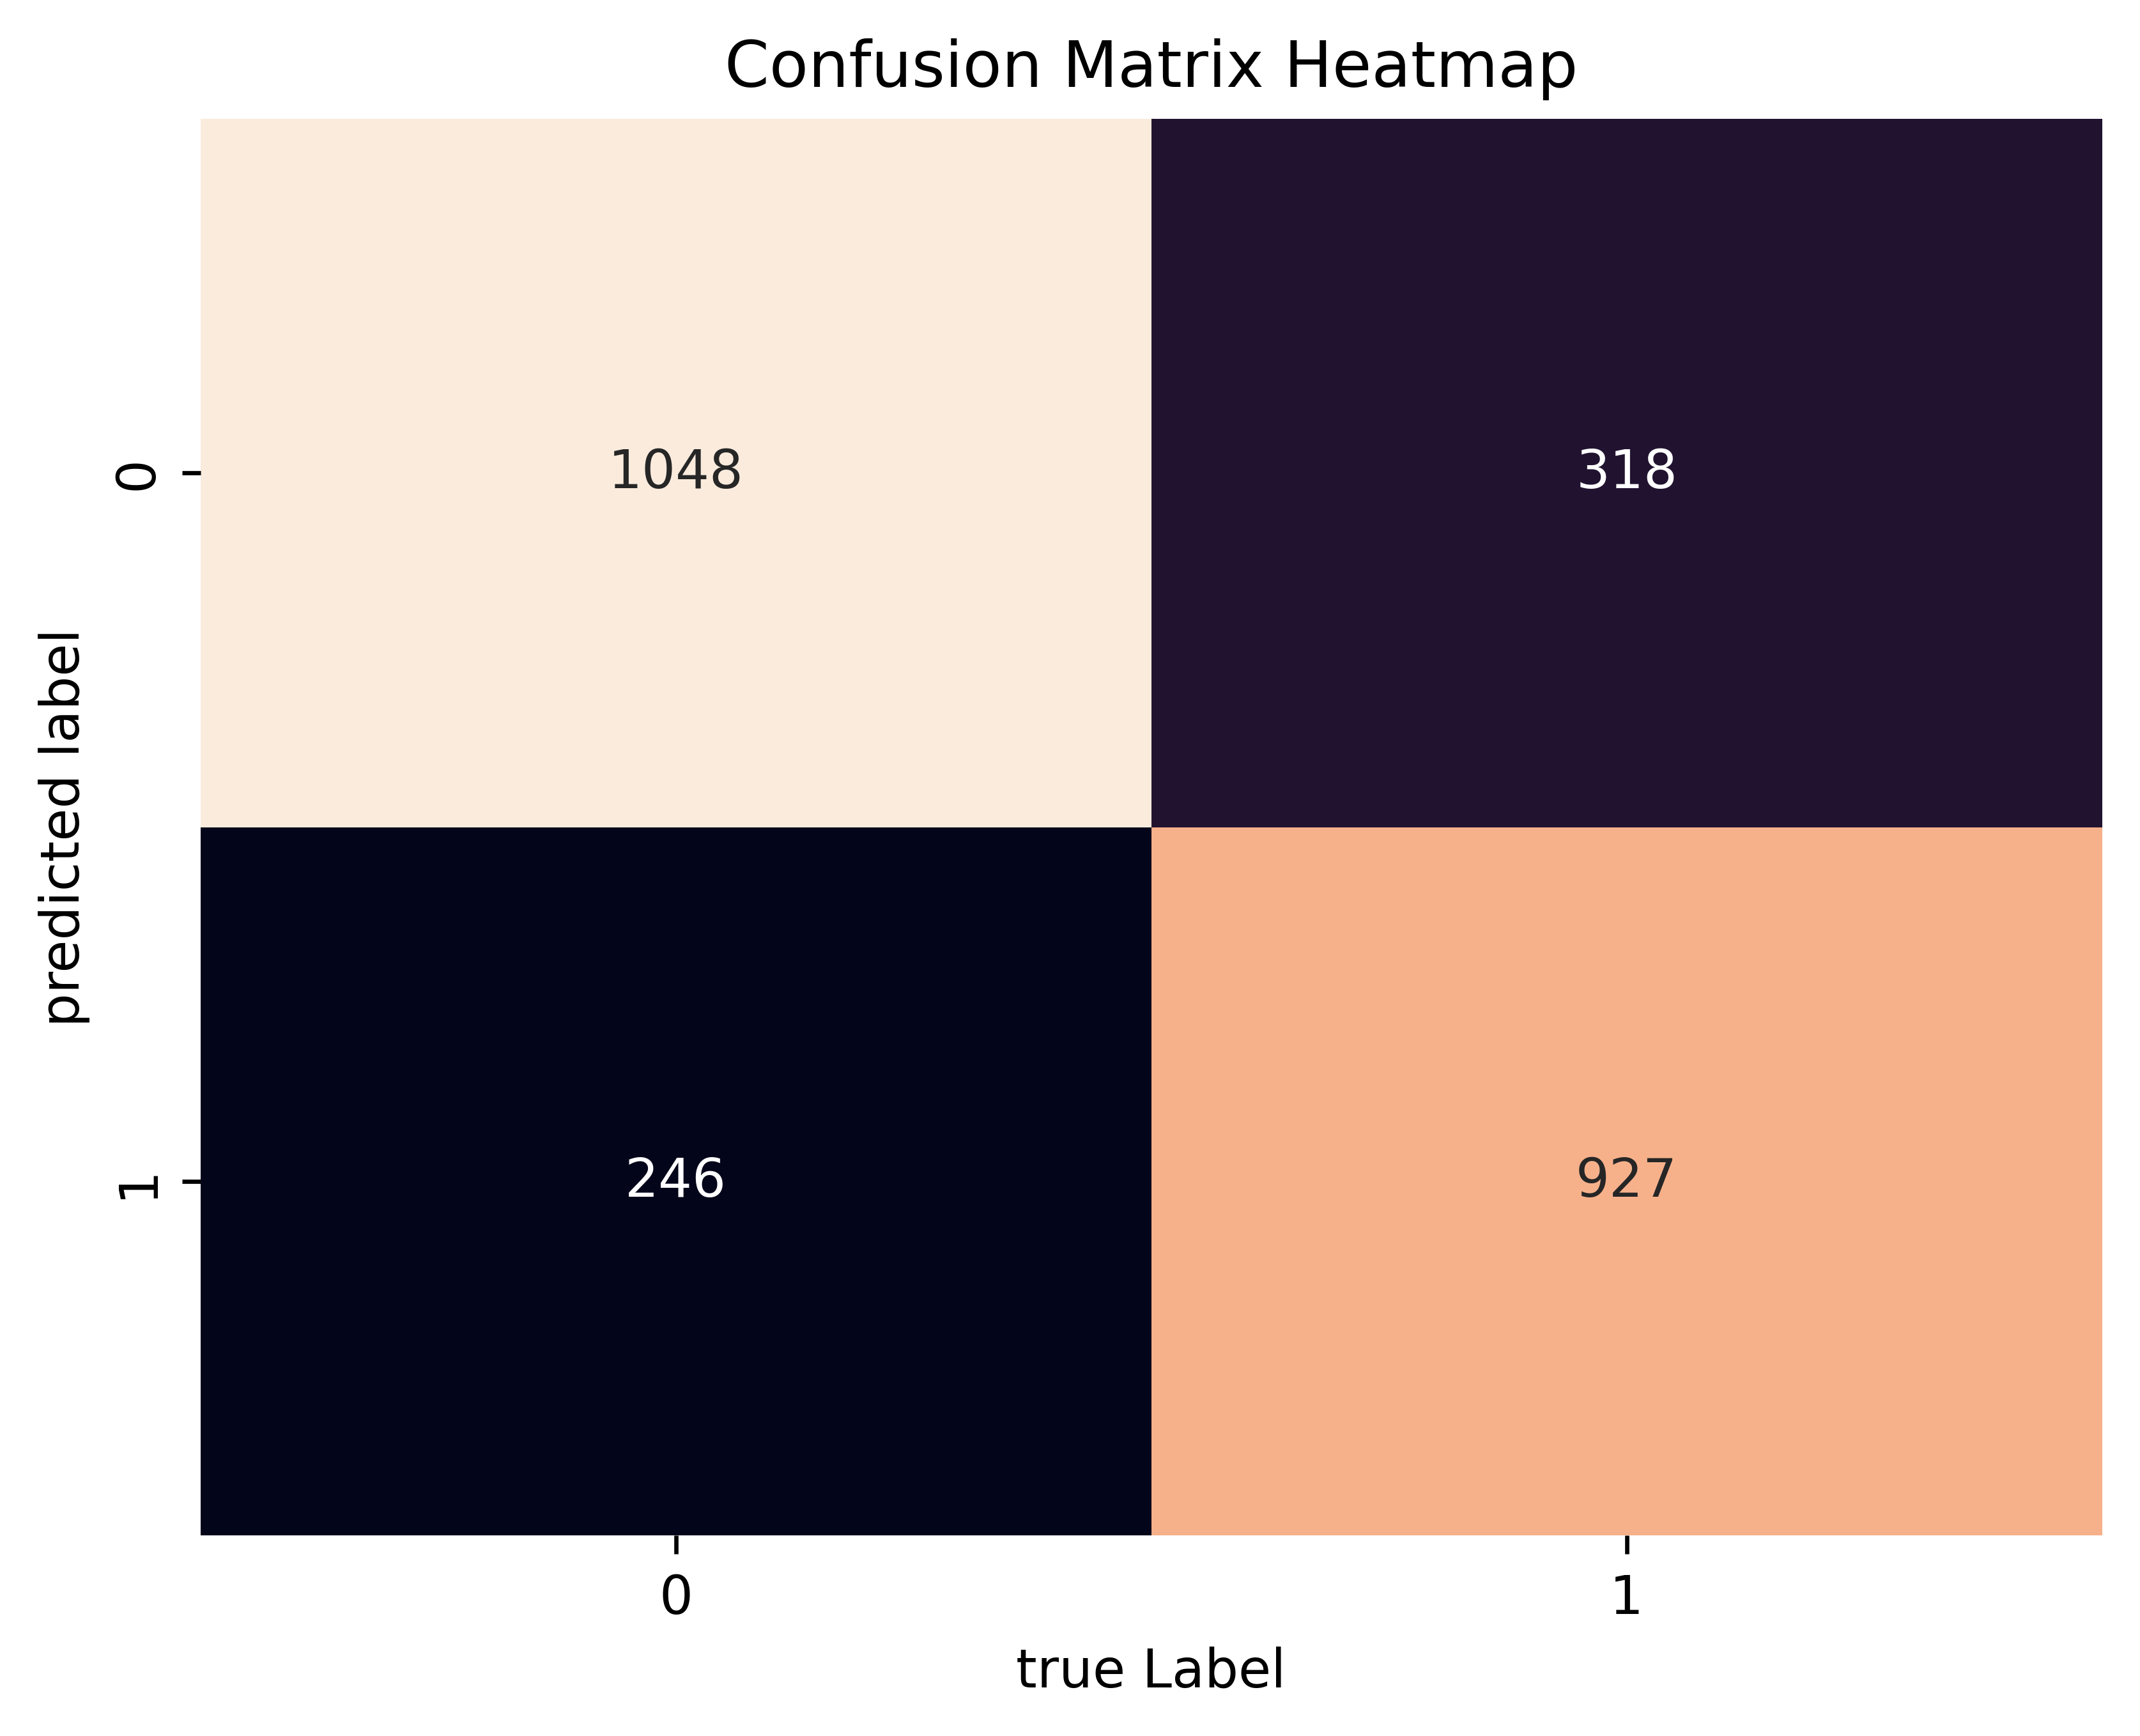

In [110]:
plt.figure(dpi=600)
mat = A
sns.heatmap(mat.T, annot=True, fmt='d', cbar = False)

plt.title("Confusion Matrix Heatmap")
plt.xlabel("true Label")
plt.ylabel('predicted label')
plt.show()

In [105]:
# f1 score
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.7879699248120301


In [57]:
from keras.layers import LSTM

In [58]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='tanh'))

In [59]:
# Model compiling

lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1276600   
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,393,977
Trainable params: 117,377
Non-trainable params: 1,276,600
_________________________________________________________________
None


In [60]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.3)

Epoch 1/6
45/45 [==============================] - 19s 345ms/step - loss: 4.6577e-05 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/6
45/45 [==============================] - 15s 339ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/6
45/45 [==============================] - 12s 269ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/6
45/45 [==============================] - 15s 346ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/6
45/45 [==============================] - 15s 335ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/6
45/45 [==============================] - 14s 306ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000


In [38]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
51/51 [==============================] - 15s 296ms/step - loss: 4.1595e-06 - acc: 1.0000 - val_loss: 3.8695e-06 - val_acc: 1.0000
Epoch 2/20
51/51 [==============================] - 15s 295ms/step - loss: 3.6315e-06 - acc: 1.0000 - val_loss: 3.3999e-06 - val_acc: 1.0000
Epoch 3/20
51/51 [==============================] - 11s 220ms/step - loss: 3.2075e-06 - acc: 1.0000 - val_loss: 3.0193e-06 - val_acc: 1.0000
Epoch 4/20
51/51 [==============================] - 15s 294ms/step - loss: 2.8611e-06 - acc: 1.0000 - val_loss: 2.7057e-06 - val_acc: 1.0000
Epoch 5/20
51/51 [==============================] - 15s 291ms/step - loss: 2.5738e-06 - acc: 1.0000 - val_loss: 2.4436e-06 - val_acc: 1.0000
Epoch 6/20
51/51 [==============================] - 12s 233ms/step - loss: 2.3322e-06 - acc: 1.0000 - val_loss: 2.2219e-06 - val_acc: 1.0000
Epoch 7/20
51/51 [==============================] - 14s 268ms/step - loss: 2.1268e-06 - acc: 1.0000 - val_loss: 2.0323e-06 - val_acc: 1.0000
Epoch 8/20
51

In [42]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=256, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
26/26 [==============================] - 13s 506ms/step - loss: 8.1159e-07 - acc: 1.0000 - val_loss: 8.0121e-07 - val_acc: 1.0000
Epoch 2/6
26/26 [==============================] - 9s 350ms/step - loss: 7.9213e-07 - acc: 1.0000 - val_loss: 7.8214e-07 - val_acc: 1.0000
Epoch 3/6
26/26 [==============================] - 13s 504ms/step - loss: 7.7339e-07 - acc: 1.0000 - val_loss: 7.6377e-07 - val_acc: 1.0000
Epoch 4/6
26/26 [==============================] - 13s 499ms/step - loss: 7.5534e-07 - acc: 1.0000 - val_loss: 7.4606e-07 - val_acc: 1.0000
Epoch 5/6
26/26 [==============================] - 10s 366ms/step - loss: 7.3793e-07 - acc: 1.0000 - val_loss: 7.2898e-07 - val_acc: 1.0000
Epoch 6/6
26/26 [==============================] - 13s 497ms/step - loss: 7.2114e-07 - acc: 1.0000 - val_loss: 7.1251e-07 - val_acc: 1.0000


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.2)

In [43]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

64/64 [==============================] - 1s 18ms/step - loss: 7.1244e-07 - acc: 1.0000


In [44]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 7.124436365302245e-07
Test Accuracy: 1.0


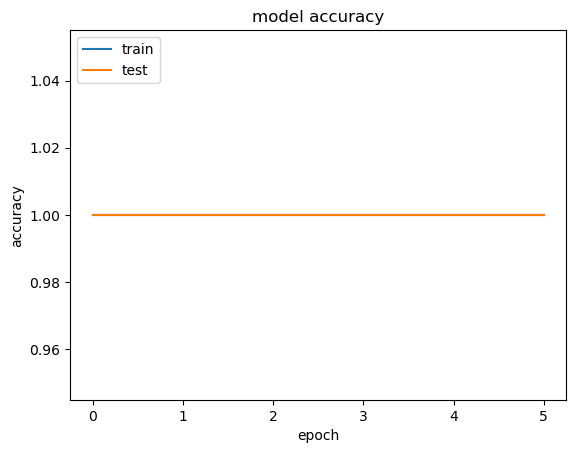

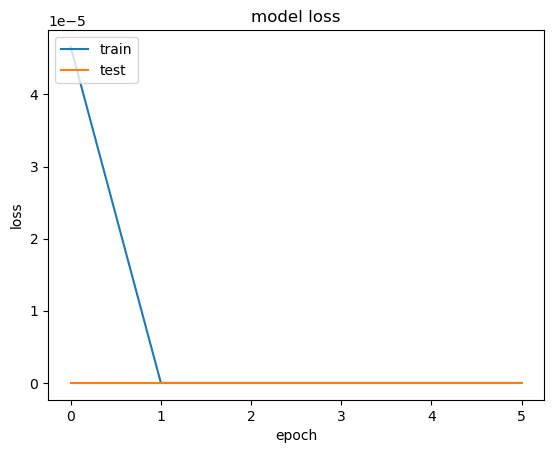

In [61]:
# Model Performance Charts
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()